In [1]:
# pyface_fennel.ipynb
# Authors: Stephan Meighen-Berger
# Comparing fennel and pyface
# Note this requires fennel to be installed (pip install fennel-seed)

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from fennel import Fennel
# package
sys.path.append("../")
from pyface import PyFace, config

In [3]:
# Location where the images should be stored
str_pics = "../pics/"

In [4]:
# initializing
number_of_runs = "1000"
config["scenario"]["events"] = number_of_runs
pf = PyFace()
fe = Fennel()

In [5]:
# Running the simulation
pf.simulation(
    energy="1 TeV",
    particle="e-"
)

--------------------------------------------------------------
Generating the mac file. This tells the geant4 scripts
what the simulation should look like
Removing the old mac file
--------------------------------------------------------------
Running (and compiling) the Geant4 scripts
-- Configuring done
-- Generating done
-- Build files have been written to: /home/meighniac/geant4/projects/showers/build
Consolidate compiler generated dependencies of target showers
[100%] Built target showers

**************************************************************
 Geant4 version Name: geant4-10-07-patch-03    (19-November-2021)
                       Copyright : Geant4 Collaboration
                      References : NIM A 506 (2003), 250-303
                                 : IEEE-TNS 53 (2006), 270-278
                                 : NIM A 835 (2016), 186-225
                             WWW : http://geant4.org/
**************************************************************

Using Csv

-

In [6]:
# Running fennel
dcounts, dcounts_sampler, em_frac, em_frac_sample, long, angles = (
    fe.auto_yields(1e3, 11, function=True)
)

In [7]:
# Loading data
str_build_dir = config["general"]["build directory"]
str_edeposit = 'Shower_h1_Etarget.csv'
str_meantrack = 'Shower_h1_Ltarget.csv'
str_pos = 'Shower_h2_Target_XZ.csv'
str_track = 'Shower_h2_Target_TrackZ.csv'
str_file_name = str_build_dir + str_edeposit
dataE = pd.read_csv(str_file_name, skiprows=6)
str_file_name = str_build_dir + str_meantrack
dataL = pd.read_csv(str_file_name, skiprows=6)
str_file_name = str_build_dir + str_pos
dataPos = pd.read_csv(str_file_name, skiprows=9)
str_file_name = str_build_dir + str_track
dataTrack = pd.read_csv(str_file_name, skiprows=9)

(800.0, 1000.0)

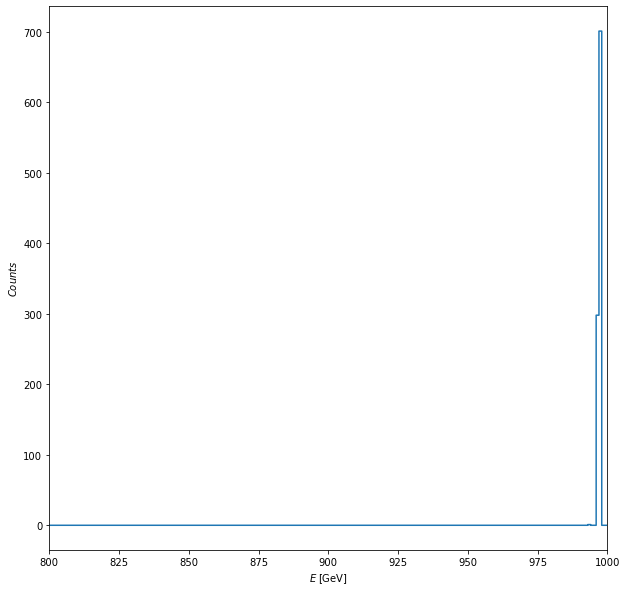

In [8]:
# The deposited energy in the target volume
lowE_cut = 1
underflow_cut = 1
overflow_cut = 1
fig, ax = plt.subplots(figsize=(10, 10))
ax.step(
    np.linspace(1, 1e3, 1000)[lowE_cut:],
    dataE["entries"][(lowE_cut+underflow_cut):(-overflow_cut)]
)
ax.set_xscale("linear")
ax.set_yscale("linear")
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
ax.set_xlabel(r"$E\;\mathrm{[GeV]}$")
ax.set_ylabel(r"$Counts$")
ax.set_xlim(800, 1000)

(5.28, 5.33)

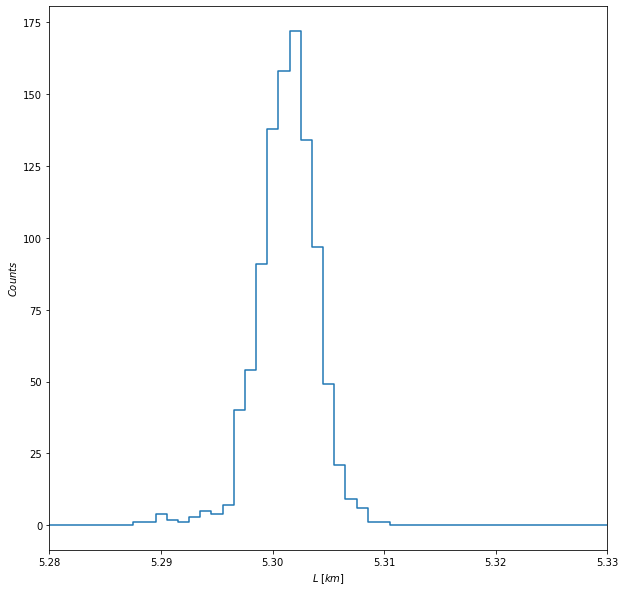

In [9]:
# Total track length of the shower
lowL_cut = 0
underflow_cut = 1
overflow_cut = 1
fig, ax = plt.subplots(figsize=(10, 10))
ax.step(
    np.linspace(0, 10, 10000)[lowL_cut:],
    dataL["entries"][(lowL_cut+underflow_cut):(-overflow_cut)]
)
ax.set_xscale("linear")
ax.set_yscale("linear")
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
ax.set_xlabel(r"$L\;[km]$")
ax.set_ylabel(r"$Counts$")
ax.set_xlim(5.28, 5.33)

In [10]:
# Fixing up the positional data
pos_vector = np.array(dataPos["entries"]).reshape((1000 + 2, 1000 + 2))

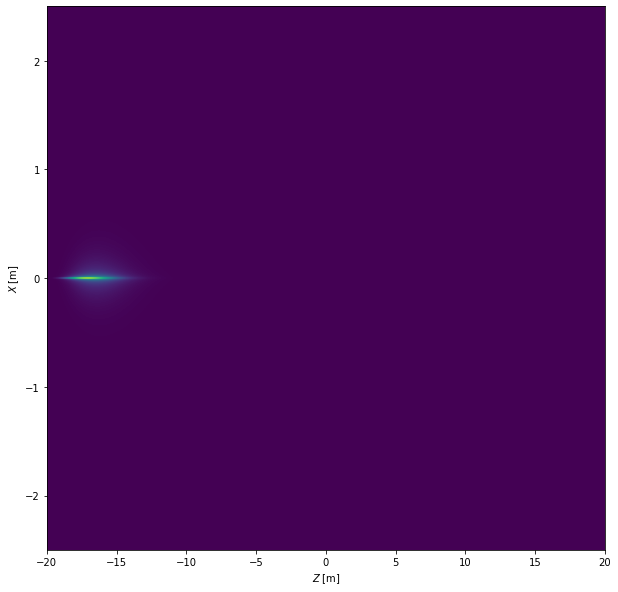

In [11]:
# The particles over all runs
underflow_cut = 1
overflow_cut = 1
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(
    pos_vector[underflow_cut:-overflow_cut, underflow_cut:-overflow_cut].T,
    aspect='auto', extent=(-20, 20, -2.5, 2.5,)
)
ax.autoscale(False)
ax.set_xscale("linear")
ax.set_yscale("linear")
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
ax.set_xlabel(r"$Z\;\mathrm{[m]}$")
ax.set_ylabel(r"$X\;\mathrm{[m]}$")
fig.savefig("/mnt/c/Users/steph/OneDrive/Shower.png", dpi=500)

In [12]:
# Constructing the multiplicity projection
multiplicity = np.sum(
    pos_vector[underflow_cut:-overflow_cut, underflow_cut:-overflow_cut].T,
    axis=0)

Text(0, 0.5, '$PDF_N$')

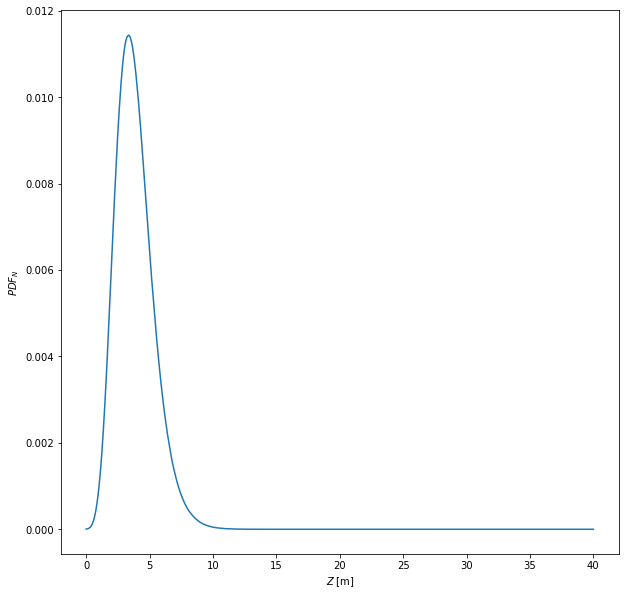

In [13]:
underflow_cut = 1
overflow_cut = 1
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(
    np.linspace(0., 40., 1000),
    multiplicity / np.sum(multiplicity)
)
ax.set_xscale("linear")
ax.set_yscale("linear")
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
ax.set_xlabel(r"$Z\;\mathrm{[m]}$")
ax.set_ylabel(r"$PDF_N$")

In [14]:
# Fixing up the track data
track_vector_unweighted = np.array(dataTrack["entries"]).reshape((1000 + 2, 10000 + 2))
track_vector_weighted = np.array(dataTrack["Sw"]).reshape((1000 + 2, 10000 + 2))

In [15]:
# Number of events
print(np.sum(track_vector_unweighted))
print(np.sum(track_vector_weighted))

2192502031
1800210033.020826


In [16]:
# Number of events after overlfow cuts
print(np.sum(track_vector_unweighted[
        underflow_cut:-overflow_cut,
        underflow_cut:-overflow_cut]))
print(np.sum(track_vector_weighted[
        underflow_cut:-overflow_cut,
        underflow_cut:-overflow_cut]))

682750410
302460848.12082535


In [17]:
# Fractions remaining after the binning process
print((np.sum(track_vector_unweighted) / np.sum(track_vector_unweighted[
        underflow_cut:-overflow_cut,
        underflow_cut:-overflow_cut]))**(-1))
print((np.sum(track_vector_weighted) / np.sum(track_vector_weighted[
        underflow_cut:-overflow_cut,
        underflow_cut:-overflow_cut]))**(-1))

0.3114024070885798
0.16801419977272522


In [18]:
# Constructing the weights track lengths projection
underflow_cut = 1
overflow_cut = 1
number_of_runs_int = int(number_of_runs)
track_vector_u_w = (
    track_vector_unweighted[
        underflow_cut:-overflow_cut,
        underflow_cut:-overflow_cut].T *
        (np.logspace(-9, 2, 10000) / 1e3 / number_of_runs_int)[:, np.newaxis]
)
track_vector_w_w = (
    track_vector_weighted[
        underflow_cut:-overflow_cut,
        underflow_cut:-overflow_cut].T *
        (np.logspace(-9, 2, 10000) / 1e3 / number_of_runs_int)[:, np.newaxis]
)

In [19]:
print(np.sum(track_vector_u_w))
print(np.sum(track_vector_w_w))

5.303850945770023
4.5124551239585875


Text(0, 0.5, '$Mean\\;[cm]$')

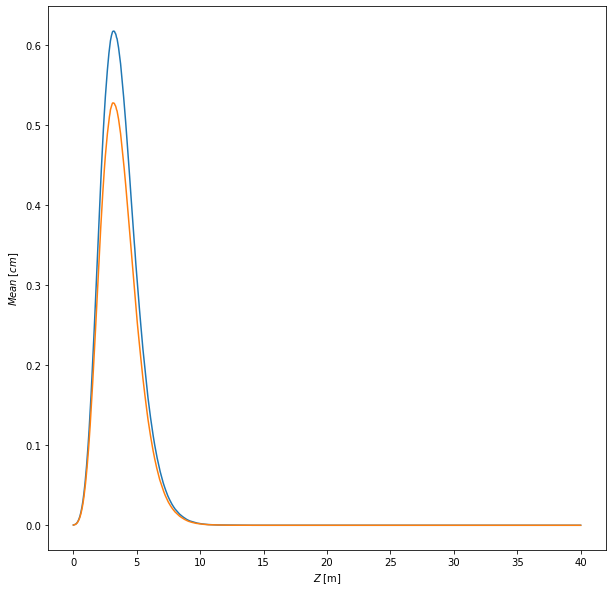

In [20]:
# The track lengths
underflow_cut = 1
overflow_cut = 1
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(
    np.linspace(0., 40., 1000),
    np.average(track_vector_u_w, axis=0) * 1e5
)
ax.plot(
    np.linspace(0., 40., 1000),
    np.average(track_vector_w_w, axis=0) * 1e5
)
ax.set_xscale("linear")
ax.set_yscale("linear")
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
ax.set_xlabel(r"$Z\;\mathrm{[m]}$")
ax.set_ylabel(r"$Mean\;[cm]$")

In [21]:
# Track sums for z:
track_sum_unweighted = np.sum(
    track_vector_u_w,
    axis=0
)
track_sum_weighted = np.sum(
    track_vector_w_w,
    axis=0
)

In [22]:
track_cumsum_unweighted = np.cumsum(track_sum_unweighted)
track_cumsum_weighted = np.cumsum(track_sum_weighted)

Text(0, 0.5, '$Current\\;Track\\;Length\\;[km]$')

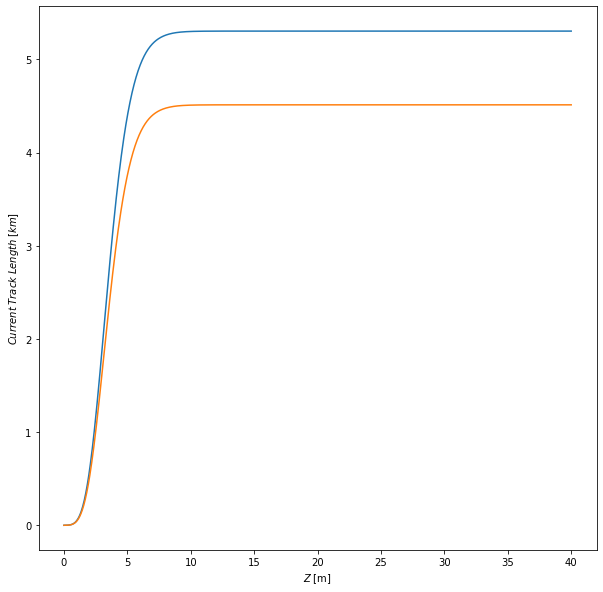

In [23]:
# The cummulative sum of the individuals
underflow_cut = 1
overflow_cut = 1
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(
    np.linspace(0., 40., 1000),
    track_cumsum_unweighted
)
ax.plot(
    np.linspace(0., 40., 1000),
    track_cumsum_weighted
)
ax.set_xscale("linear")
ax.set_yscale("linear")
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
ax.set_xlabel(r"$Z\;\mathrm{[m]}$")
ax.set_ylabel(r"$Current\;Track\;Length\;[km]$")

In [24]:
z_grid = np.linspace(0., 40., 1000)

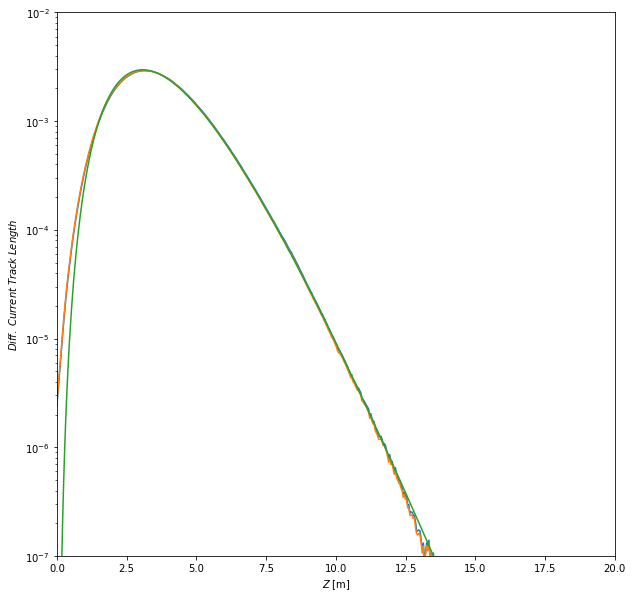

In [25]:
# The differential of the cummulative sum of the individuals
underflow_cut = 1
overflow_cut = 1
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(
    np.linspace(0., 40., 1000)[:-1],
    np.diff(track_cumsum_unweighted) / np.diff(np.linspace(0., 40., 1000) * 1e2) / track_cumsum_unweighted[-1]
)
ax.plot(
    np.linspace(0., 40., 1000)[:-1],
    np.diff(track_cumsum_weighted) / np.diff(np.linspace(0., 40., 1000) * 1e2) / track_cumsum_weighted[-1]
)
ax.plot(
    z_grid,
    long(1e3, z_grid * 1e2)[0] / np.trapz(long(1e3, z_grid * 1e2)[0], x=z_grid*1e2)
)
ax.set_xscale("linear")
ax.set_yscale("log")
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
ax.set_xlim(0., 20)
ax.set_ylim(1e-7, 1e-2)
ax.set_xlabel(r"$Z\;\mathrm{[m]}$")
ax.set_ylabel(r"$Diff.\;Current\;Track\;Length$")
fig.savefig("/mnt/c/Users/steph/OneDrive/Fennel_Comparison.png", dpi=500)